In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
from sklearn.datasets import make_classification


In [27]:
X,y=make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1,n_redundant=0)
X

array([[ 0.73402907, -1.20505227],
       [-1.20954126, -1.20400342],
       [-2.40980545, -2.29037238],
       ...,
       [-0.69261132, -0.74973502],
       [ 0.51315593, -1.6623622 ],
       [ 1.28348456, -0.59437825]], shape=(1000, 2))

In [28]:
pd.DataFrame(X)[0]

0      0.734029
1     -1.209541
2     -2.409805
3      0.045024
4      1.220342
         ...   
995   -1.414392
996   -0.408064
997   -0.692611
998    0.513156
999    1.283485
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

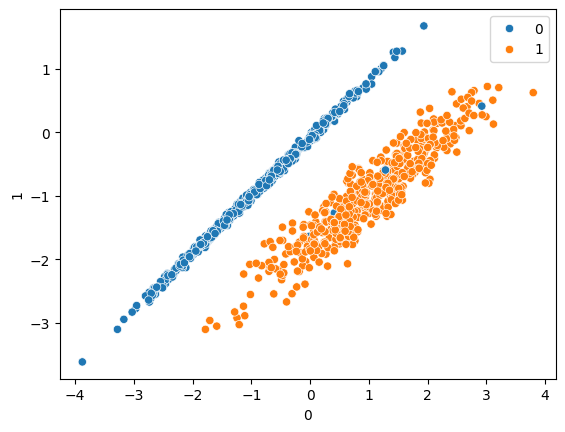

In [29]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [31]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)



In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[127   1]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.99      1.00      1.00       122

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [33]:
rbf_svc=SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)
y_pred_rbf=rbf_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))

[[127   1]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.99      1.00      1.00       122

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [34]:
# GRID SEARCH CV
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5)


In [35]:
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}